### [ 10 / 30 과제 : 남한북한데이터셋으로 지지고볶기 ]
- 데이터 : 남북한발전전력량.xlsx
- (1) 남한의 종류별 발전전력량의 변화
- (2) 북한의 종류별 발전전력량의 변화
- (3) 남한과 북한의 비교
- (4) 북한의 신재생 컬럼/남북한 합계, 항목별 총합 컬럼 추가

In [370]:
## 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib 

In [371]:
## 파일 로딩
DATA_FILE = '../DATA/남북한발전전력량.xlsx'

dataDF = pd.read_excel(DATA_FILE)

dataDF

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [372]:
# (1) 남한의 종류별 발전전력량의 변화
## 결측치를 이전값으로 변경
dataDF['전력량 (억㎾h)'] = dataDF['전력량 (억㎾h)'].ffill()



In [373]:
## 결측치 0으로 바꾸기
dataDF = dataDF.replace('-', np.nan)
dataDF.fillna(value=0, inplace=True)
dataDF

C:\Users\qjadl\AppData\Local\Temp\ipykernel_4556\1044493445.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF = dataDF.replace('-', np.nan)


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077.0,1186.0,1310.0,1444.0,1650.0,1847.0,2055.0,2244.0,...,4031.0,4224.0,4336.0,4747.0,4969.0,5096.0,5171.0,5220.0,5281.0,5404.0
1,남한,수력,64.0,51.0,49.0,60.0,41.0,55.0,52.0,54.0,...,50.0,56.0,56.0,65.0,78.0,77.0,84.0,78.0,58.0,66.0
2,남한,화력,484.0,573.0,696.0,803.0,1022.0,1122.0,1264.0,1420.0,...,2551.0,2658.0,2802.0,3196.0,3343.0,3430.0,3581.0,3427.0,3402.0,3523.0
3,남한,원자력,529.0,563.0,565.0,581.0,587.0,670.0,739.0,771.0,...,1429.0,1510.0,1478.0,1486.0,1547.0,1503.0,1388.0,1564.0,1648.0,1620.0
4,남한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,86.0,118.0,151.0,173.0,195.0
5,북한,합계,277.0,263.0,247.0,221.0,231.0,230.0,213.0,193.0,...,236.0,255.0,235.0,237.0,211.0,215.0,221.0,216.0,190.0,239.0
6,북한,수력,156.0,150.0,142.0,133.0,138.0,142.0,125.0,107.0,...,133.0,141.0,125.0,134.0,132.0,135.0,139.0,130.0,100.0,128.0
7,북한,화력,121.0,113.0,105.0,88.0,93.0,88.0,88.0,86.0,...,103.0,114.0,110.0,103.0,79.0,80.0,82.0,86.0,90.0,111.0
8,북한,원자력,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [374]:
dataDF.loc[9] = ['북한','신재생'] + [0]*27
dataDF

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077.0,1186.0,1310.0,1444.0,1650.0,1847.0,2055.0,2244.0,...,4031.0,4224.0,4336.0,4747.0,4969.0,5096.0,5171.0,5220.0,5281.0,5404.0
1,남한,수력,64.0,51.0,49.0,60.0,41.0,55.0,52.0,54.0,...,50.0,56.0,56.0,65.0,78.0,77.0,84.0,78.0,58.0,66.0
2,남한,화력,484.0,573.0,696.0,803.0,1022.0,1122.0,1264.0,1420.0,...,2551.0,2658.0,2802.0,3196.0,3343.0,3430.0,3581.0,3427.0,3402.0,3523.0
3,남한,원자력,529.0,563.0,565.0,581.0,587.0,670.0,739.0,771.0,...,1429.0,1510.0,1478.0,1486.0,1547.0,1503.0,1388.0,1564.0,1648.0,1620.0
4,남한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,86.0,118.0,151.0,173.0,195.0
5,북한,합계,277.0,263.0,247.0,221.0,231.0,230.0,213.0,193.0,...,236.0,255.0,235.0,237.0,211.0,215.0,221.0,216.0,190.0,239.0
6,북한,수력,156.0,150.0,142.0,133.0,138.0,142.0,125.0,107.0,...,133.0,141.0,125.0,134.0,132.0,135.0,139.0,130.0,100.0,128.0
7,북한,화력,121.0,113.0,105.0,88.0,93.0,88.0,88.0,86.0,...,103.0,114.0,110.0,103.0,79.0,80.0,82.0,86.0,90.0,111.0
8,북한,원자력,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,북한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [375]:
## 세로합계
geo_col = '전력량 (억㎾h)'
type_col = '발전 전력별'

for year in dataDF.columns[2:]:
    val1 = dataDF.loc[(dataDF[geo_col] == '남한') & (dataDF[type_col] == '합계'), year].item()
    val2 = dataDF.loc[(dataDF[geo_col] == '북한') & (dataDF[type_col] == '합계'), year].item()
    dataDF.loc[10, year] = val1 + val2

dataDF.iloc[10,:2] = ['남한+북한', '총합계']

In [376]:
dataDF

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077.0,1186.0,1310.0,1444.0,1650.0,1847.0,2055.0,2244.0,...,4031.0,4224.0,4336.0,4747.0,4969.0,5096.0,5171.0,5220.0,5281.0,5404.0
1,남한,수력,64.0,51.0,49.0,60.0,41.0,55.0,52.0,54.0,...,50.0,56.0,56.0,65.0,78.0,77.0,84.0,78.0,58.0,66.0
2,남한,화력,484.0,573.0,696.0,803.0,1022.0,1122.0,1264.0,1420.0,...,2551.0,2658.0,2802.0,3196.0,3343.0,3430.0,3581.0,3427.0,3402.0,3523.0
3,남한,원자력,529.0,563.0,565.0,581.0,587.0,670.0,739.0,771.0,...,1429.0,1510.0,1478.0,1486.0,1547.0,1503.0,1388.0,1564.0,1648.0,1620.0
4,남한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,86.0,118.0,151.0,173.0,195.0
5,북한,합계,277.0,263.0,247.0,221.0,231.0,230.0,213.0,193.0,...,236.0,255.0,235.0,237.0,211.0,215.0,221.0,216.0,190.0,239.0
6,북한,수력,156.0,150.0,142.0,133.0,138.0,142.0,125.0,107.0,...,133.0,141.0,125.0,134.0,132.0,135.0,139.0,130.0,100.0,128.0
7,북한,화력,121.0,113.0,105.0,88.0,93.0,88.0,88.0,86.0,...,103.0,114.0,110.0,103.0,79.0,80.0,82.0,86.0,90.0,111.0
8,북한,원자력,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,북한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [377]:
## 가로합
dataDF['총합'] = dataDF.iloc[:,2:].sum(axis=1)
dataDF

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,총합
0,남한,합계,1077.0,1186.0,1310.0,1444.0,1650.0,1847.0,2055.0,2244.0,...,4224.0,4336.0,4747.0,4969.0,5096.0,5171.0,5220.0,5281.0,5404.0,88523.0
1,남한,수력,64.0,51.0,49.0,60.0,41.0,55.0,52.0,54.0,...,56.0,56.0,65.0,78.0,77.0,84.0,78.0,58.0,66.0,1599.0
2,남한,화력,484.0,573.0,696.0,803.0,1022.0,1122.0,1264.0,1420.0,...,2658.0,2802.0,3196.0,3343.0,3430.0,3581.0,3427.0,3402.0,3523.0,55136.0
3,남한,원자력,529.0,563.0,565.0,581.0,587.0,670.0,739.0,771.0,...,1510.0,1478.0,1486.0,1547.0,1503.0,1388.0,1564.0,1648.0,1620.0,31067.0
4,남한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,86.0,118.0,151.0,173.0,195.0,723.0
5,북한,합계,277.0,263.0,247.0,221.0,231.0,230.0,213.0,193.0,...,255.0,235.0,237.0,211.0,215.0,221.0,216.0,190.0,239.0,5914.0
6,북한,수력,156.0,150.0,142.0,133.0,138.0,142.0,125.0,107.0,...,141.0,125.0,134.0,132.0,135.0,139.0,130.0,100.0,128.0,3408.0
7,북한,화력,121.0,113.0,105.0,88.0,93.0,88.0,88.0,86.0,...,114.0,110.0,103.0,79.0,80.0,82.0,86.0,90.0,111.0,2506.0
8,북한,원자력,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,북한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- (1) 남한의 종류별 발전전력량의 변화
- (2) 북한의 종류별 발전전력량의 변화
- (3) 남한과 북한의 비교
- (4) 북한의 신재생 컬럼/남북한 합계, 항목별 총합 컬럼 추가

[1] <hr>

In [378]:
# 1) 남한의 종류별 발전전력량의 변화
data1 = dataDF[dataDF['전력량 (억㎾h)']=='남한']

data1 = data1.drop(0)
data1 = data1.reset_index()
data1 = data1.drop(columns='index')
data1

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,총합
0,남한,수력,64.0,51.0,49.0,60.0,41.0,55.0,52.0,54.0,...,56.0,56.0,65.0,78.0,77.0,84.0,78.0,58.0,66.0,1599.0
1,남한,화력,484.0,573.0,696.0,803.0,1022.0,1122.0,1264.0,1420.0,...,2658.0,2802.0,3196.0,3343.0,3430.0,3581.0,3427.0,3402.0,3523.0,55136.0
2,남한,원자력,529.0,563.0,565.0,581.0,587.0,670.0,739.0,771.0,...,1510.0,1478.0,1486.0,1547.0,1503.0,1388.0,1564.0,1648.0,1620.0,31067.0
3,남한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,86.0,118.0,151.0,173.0,195.0,723.0


In [379]:
# ## 타입확인
# type(data1)
# data1.info()

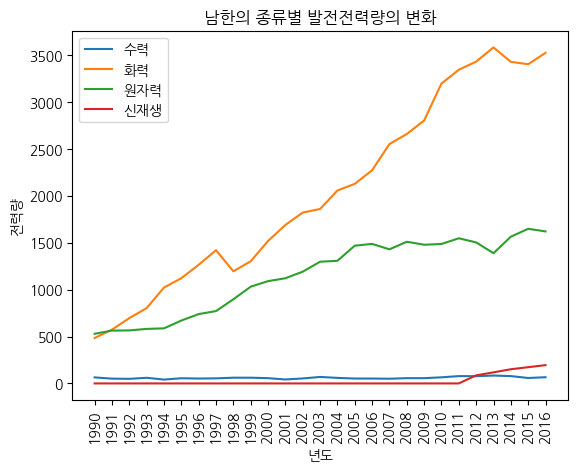

In [380]:
## 그래프 그리기
# col = data1.columns[2:]
data3 = data1.set_index('발전 전력별')
idx = data1.index

for label_idx in zip(idx,data3.index):
    plt.plot(data1.iloc[label_idx[0], 2:-1], label=label_idx[1])

plt.legend()
plt.title('남한의 종류별 발전전력량의 변화')
plt.xlabel('년도')
plt.ylabel('전력량')
plt.xticks(rotation=90)     # x축 라벨을 가로 => 90도 회전  ( 좁아서 다 못나타낸거 이제는 보임 )
plt.show()


[2] <hr>

In [381]:
# 2) 북한의 종류별 발전전력량의 변화
data2 = dataDF[dataDF['전력량 (억㎾h)']=='북한']

data2 = data2.drop(index=5)
data2 = data2.reset_index()
data2 = data2.drop(columns='index')
data2

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,총합
0,북한,수력,156.0,150.0,142.0,133.0,138.0,142.0,125.0,107.0,...,141.0,125.0,134.0,132.0,135.0,139.0,130.0,100.0,128.0,3408.0
1,북한,화력,121.0,113.0,105.0,88.0,93.0,88.0,88.0,86.0,...,114.0,110.0,103.0,79.0,80.0,82.0,86.0,90.0,111.0,2506.0
2,북한,원자력,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,북한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


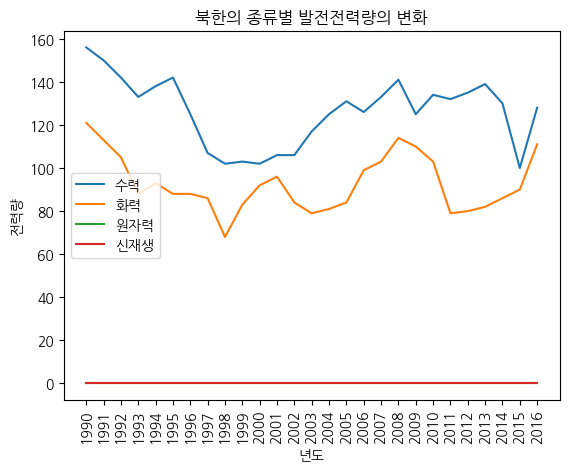

In [382]:
## 그래프 그리기
# col = data1.columns[2:]
data3 = data2.set_index('발전 전력별')
idx = data2.index

for label_idx in zip(idx,data3.index):
    plt.plot(data2.iloc[label_idx[0], 2:-1], label=label_idx[1])

plt.legend()
plt.title('북한의 종류별 발전전력량의 변화')
plt.xlabel('년도')
plt.ylabel('전력량')
plt.xticks(rotation=90)     # x축 라벨을 가로 => 90도 회전  ( 좁아서 다 못나타낸거 이제는 보임 )
plt.show()

[3] 남한과 북한의 비교 <hr>

In [383]:
# 3) 남한과 북한의 비교
data3 = dataDF[dataDF['발전 전력별']=='합계']

data3 = data3.reset_index()
data3 = data3.drop(columns='index')
data3

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,총합
0,남한,합계,1077.0,1186.0,1310.0,1444.0,1650.0,1847.0,2055.0,2244.0,...,4224.0,4336.0,4747.0,4969.0,5096.0,5171.0,5220.0,5281.0,5404.0,88523.0
1,북한,합계,277.0,263.0,247.0,221.0,231.0,230.0,213.0,193.0,...,255.0,235.0,237.0,211.0,215.0,221.0,216.0,190.0,239.0,5914.0


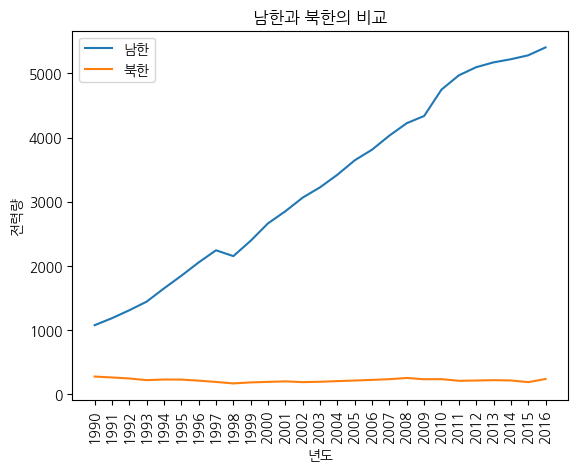

In [386]:
## 그래프 그리기
# col = data1.columns[2:]
data4 = data3.set_index('전력량 (억㎾h)')
idx = data3.index

for label_idx in zip(idx,data4.index):
    plt.plot(data3.iloc[label_idx[0], 2:-1], label=label_idx[1])

plt.legend()
plt.title('남한과 북한의 비교')
plt.xlabel('년도')
plt.ylabel('전력량')
plt.xticks(rotation=90)     # x축 라벨을 가로 => 90도 회전  ( 좁아서 다 못나타낸거 이제는 보임 )
plt.show()

[4] 북한의 신재생 컬럼/남북한 합계, 항목별 총합 컬럼 추가 <hr>

In [385]:
dataDF

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,총합
0,남한,합계,1077.0,1186.0,1310.0,1444.0,1650.0,1847.0,2055.0,2244.0,...,4224.0,4336.0,4747.0,4969.0,5096.0,5171.0,5220.0,5281.0,5404.0,88523.0
1,남한,수력,64.0,51.0,49.0,60.0,41.0,55.0,52.0,54.0,...,56.0,56.0,65.0,78.0,77.0,84.0,78.0,58.0,66.0,1599.0
2,남한,화력,484.0,573.0,696.0,803.0,1022.0,1122.0,1264.0,1420.0,...,2658.0,2802.0,3196.0,3343.0,3430.0,3581.0,3427.0,3402.0,3523.0,55136.0
3,남한,원자력,529.0,563.0,565.0,581.0,587.0,670.0,739.0,771.0,...,1510.0,1478.0,1486.0,1547.0,1503.0,1388.0,1564.0,1648.0,1620.0,31067.0
4,남한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,86.0,118.0,151.0,173.0,195.0,723.0
5,북한,합계,277.0,263.0,247.0,221.0,231.0,230.0,213.0,193.0,...,255.0,235.0,237.0,211.0,215.0,221.0,216.0,190.0,239.0,5914.0
6,북한,수력,156.0,150.0,142.0,133.0,138.0,142.0,125.0,107.0,...,141.0,125.0,134.0,132.0,135.0,139.0,130.0,100.0,128.0,3408.0
7,북한,화력,121.0,113.0,105.0,88.0,93.0,88.0,88.0,86.0,...,114.0,110.0,103.0,79.0,80.0,82.0,86.0,90.0,111.0,2506.0
8,북한,원자력,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,북한,신재생,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
